In [12]:
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F

import matplotlib.pyplot as plt
from IPython.display import display
display('svg')

'svg'

### Import and Process the data

In [13]:
#import dataset
data = np.loadtxt(open(r"C:\Users\knock\Downloads\mnist_train_small.csv", 'rb'), delimiter=',')

#don't need labels
data = data[:,1:]

#normalize the data toa range of [0 1]
data_norm = data/np.max(data)

#convert to tensor
data_t = torch.tensor(data_norm).float()

### Creat the DL model

In [20]:
#create a class for the model
def create_mnist_ae():

    class ae_net(nn.Module):
        def __init__(self):
            super().__init__()

            ### input layer
            self.input = nn.Linear(784,128)

            ### encoder layer
            self.enc = nn.Parameter(torch.randn(50,128))
            #self.enc = nn.Linear(128,50) #comaprison between Linear and Parameter

            ###latern layer
            # self.lat = nn.Linear(50,128)   #(not used!)

            ### decoder layer
            self.dec = nn.Linear(128,784)

        #forward pass
        def forward(self,x):
            #'Normal' forward pro in the first stage
            x = F.relu( self.input(x) )

            # a parameter type is not a Linear type, so we implement the multiplication direct
            x = x.t() # need to transpose the input matrix due to multisamlpe input matrices
            x = F.relu( self.enc@x)

            #same for the decoder layer but reversed
            x = F.relu( self.enc.t()@x)
            x = x.t()

            #"normal" final stage
            y = torch.sigmoid( self.dec(x) )
            return y
    #create the model instances

    net = ae_net()

    #loss function
    loss_fun = nn.MSELoss()

    #optimizer
    optimizer = torch.optim.Adam(net.parameters(),lr =.001)

    return net, loss_fun, optimizer

In [21]:
#sanity test
net, lossfun, optimizer = create_mnist_ae()

X= data_t[:5,:]
y_hat = net(X)

print(X.shape)
print(y_hat.shape)

torch.Size([5, 784])
torch.Size([5, 784])


### Create a function that trains the model

In [22]:
def trian_model():

    #number of epochs
    n_epochs = 10000

    #create a new model
    net,lossfun,optimizer = create_mnist_ae()

    #initialize losses
    losses = torch.zeros(n_epochs)

    #loop over epochs
    for epochi in range(n_epochs):

        #select a random set of images
        random_indx= np.random.choice(data_t.shape[0], size = 32)
        X = data_t[random_indx,:]

        #forward pass and loss
        y_hat = net(X)
        loss = lossfun(y_hat,X)

        #backprop
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        #losses in this epoch
        losses[epochi] = loss.item()

    return losses, net

###Run the model and show the result

Final loss: 0.0203


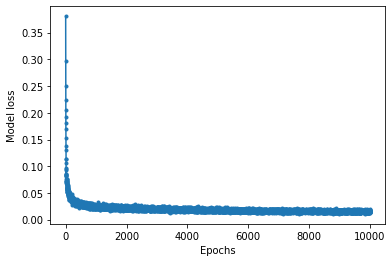

In [23]:
#train the model
losses, net = trian_model()
print(f"Final loss: {losses[-1]:.4f}")

#visualize the losses
plt.plot(losses,'.-')
plt.xlabel('Epochs')
plt.ylabel("Model loss")
plt.show()

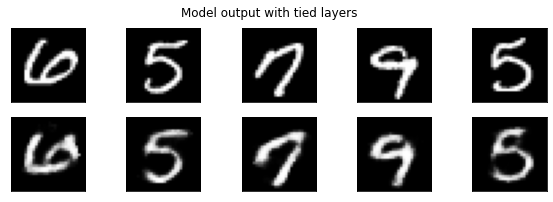

In [24]:
# Visualization of inputs and outputs
X = data_t[:5,:]
yHat = net(X)

# let's see what the model did!
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(yHat[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.suptitle('Model output with tied layers')
plt.show()

### Add noise to see a use case of an encoder

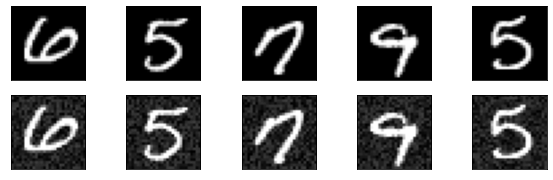

In [26]:
# grab a small set of images
X = data_t[:10,:]

# add noise
Xnoise = X + torch.rand_like(X)/4

# clip at 1
Xnoise[Xnoise>1] = 1


# show the noisy images
fig,axs = plt.subplots(2,5,figsize=(10,3))

for i in range(5):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])

plt.show()

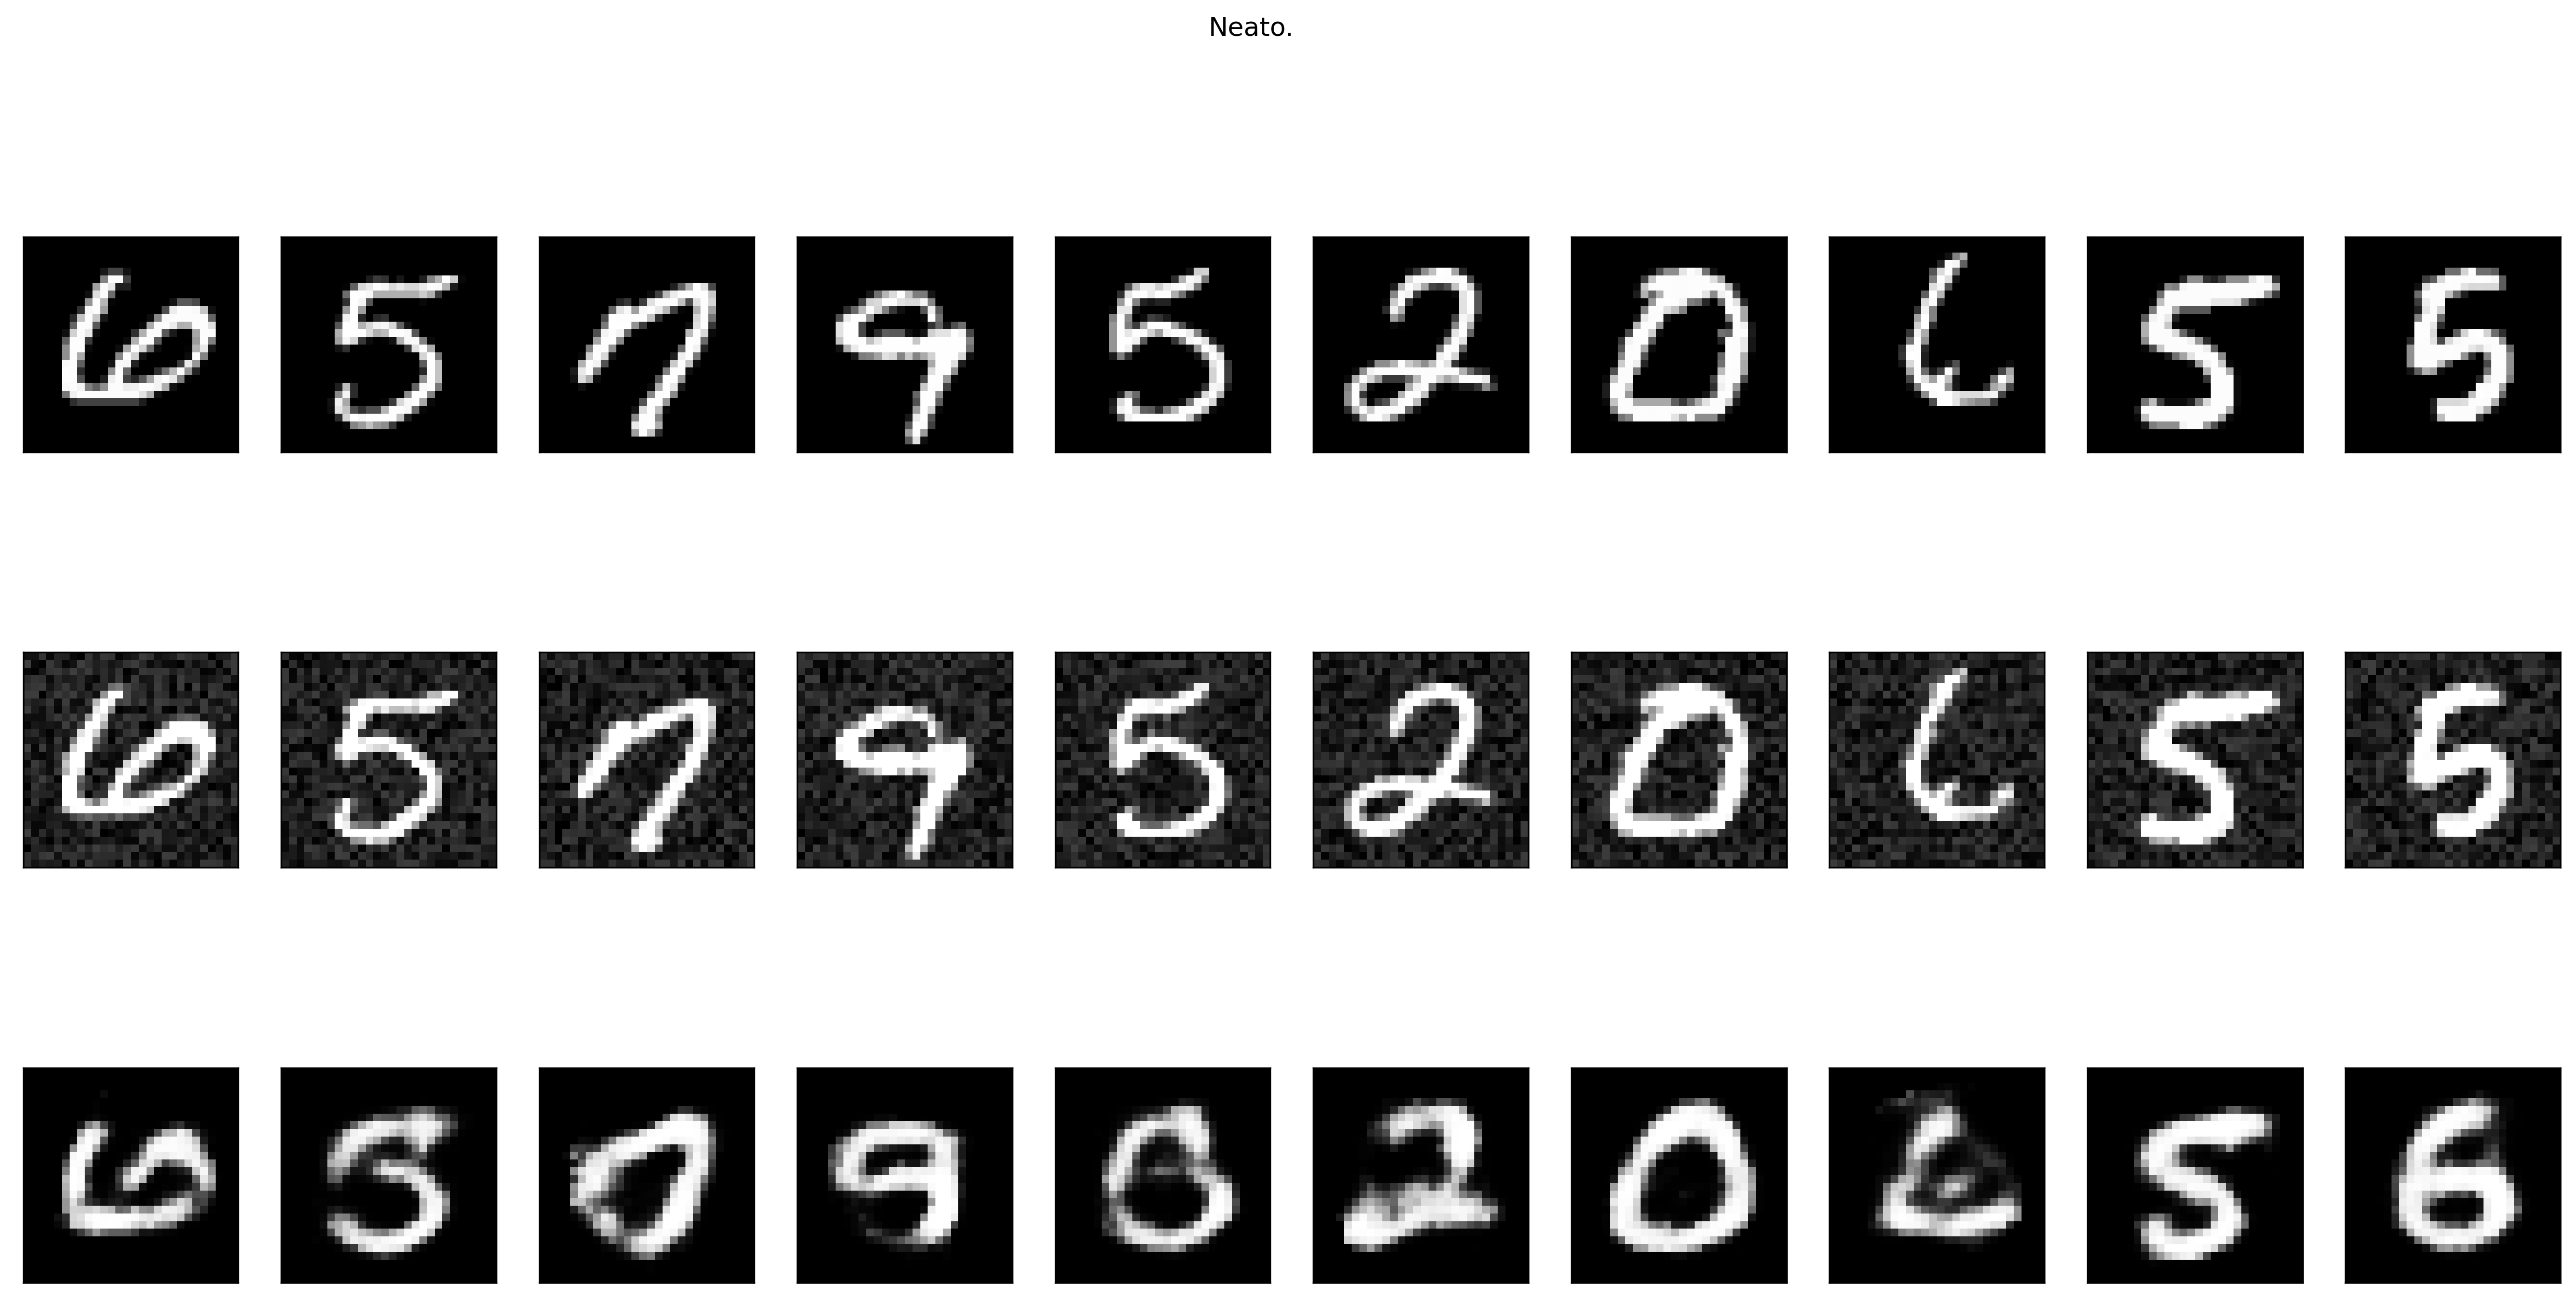

In [32]:
# run through the model
Y = net(Xnoise)


# show the noisy images
fig,axs = plt.subplots(3,10,figsize=(21,10),dpi=300)

for i in range(10):
  axs[0,i].imshow(X[i,:].view(28,28).detach() ,cmap='gray')
  axs[1,i].imshow(Xnoise[i,:].view(28,28).detach() ,cmap='gray')
  axs[2,i].imshow(Y[i,:].view(28,28).detach() ,cmap='gray')
  axs[0,i].set_xticks([]), axs[0,i].set_yticks([])
  axs[1,i].set_xticks([]), axs[1,i].set_yticks([])
  axs[2,i].set_xticks([]), axs[2,i].set_yticks([])

plt.suptitle('Neato.')
plt.show()